In [35]:
from scrape import topstbot

nation = 'de'
headlines = topstbot.to_dataframe(since='2020-03-01T00:00:00.000Z', tagged=['day', nation])

In [36]:
from lxml.html.soupparser import fromstring

headlines['content'] = [fromstring(h).text_content() for h in headlines['content']]
headlines['date'] = headlines.index.normalize().tz_localize(None)

In [20]:
from scrape import entorb

cases = entorb.to_dataframe('DE-total')

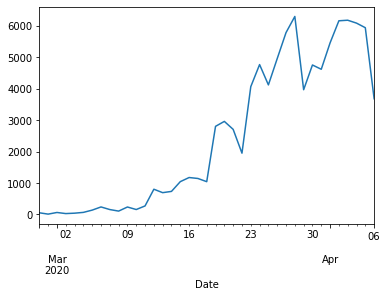

In [21]:
import matplotlib.pyplot as plt
cases_new = cases['Cases_New']

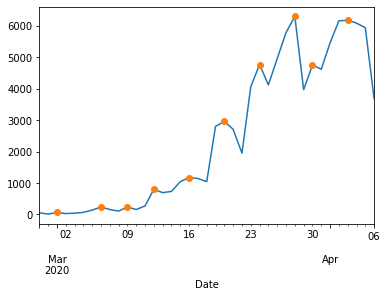

In [38]:
peak_cases_new = cases_new[(cases_new.shift(1) < cases_new) & (cases_new.shift(-1) < cases_new)]
cases_new.plot(kind='line')
peak_cases_new.plot(kind='line', linestyle='', marker='o')

In [45]:
import pandas as pd

pd.set_option('display.max_colwidth', None)
for date in peak_cases_new.index:
    headline = headlines[headlines['date'] == date]
    line = str(headline['content']).replace('  ','').replace('000+00:00',' ')
    print(line[:line.find('\\t')])
pd.set_option('display.max_colwidth', 80)

created_at
2020-03-01 19:00:07.337 Satellitendaten: Coronavirus führt in China zu Rückgang der Luftverschmutzung
created_at
2020-03-06 19:00:08.185  “Es wird nicht bei 13.000 bleiben“ – Kurz warnt EU-Staaten
created_at
2020-03-09 19:00:16.234 CDU-Chefin rechnet mit weiteren Ländern in "Koalition der Willigen"
created_at
2020-03-12 19:00:08.509 Verfassungsschutz beobachtet "Flügel" der AfD
created_at
2020-03-16 19:00:06.695 Lebensmittelgeschäfte in Bayern dürfen länger öffnen
created_at
2020-03-20 19:00:12.732  An alle, die jetzt noch immer rausgehen: Seid ihr eigentlich komplett bescheuert?
created_at
2020-03-24 19:00:08.779 Entschädigung bei Verdienstausfall: Staat zahlt bis zu 2016 Euro bei Kitaschließung
created_at
2020-03-28 19:00:07.744  Krankenschwester: "Ich will nicht infiziert sein und arbeiten müssen"
created_at
2020-03-30 18:00:08.574 Coronavirus in Deutschland: Mehr als 62.000 Infizierte – Live-Karte
created_at
2020-04-03 18:00:08.162 Coronavirus in Deutschland – über 1.000